In [1]:
# setup
import math
import statistics
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import random


def set_seed(seed=42):
  rng = random.Random()
  if seed is None:
    seed = random.randint(0, 9999)
  rng.seed(seed)
  np.random.seed(seed)


In [2]:
# 4.1 part 1
set_seed()
n = 1000
# note I accidentally overwrote this part :/ (but already got the results)!

corrs: avg = 0.0009, stdev = 0.3386


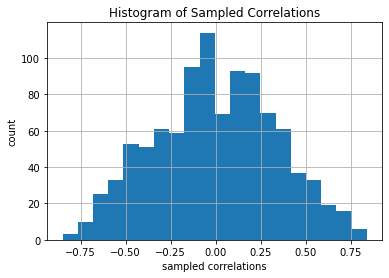

195/1000 had a correlation >= 0.3
computed p-value: 0.1950


In [15]:
# 4.1 part2

set_seed()
#set_seed(None)

n = 1000
assumed_corr = 0.3

pvals = []
corrs = []
for _ in range(n):
  # sample two sets of values that come from the same distribution
  #   (any distribution as long as its the same)
  a_vals = np.random.normal(size=10)
  s_vals = np.random.normal(size=10)

  # compute (perasons's) correlation of these values
  #   https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/
  corr, p_val = stats.pearsonr(s_vals, a_vals)

  # compute p-val of likelihood the assumed_corr is true
  #  (using independent sample t-test to compare 2 samples of unknown distributions)
  # print(t_stat)
  # print(p_val)
  #pvals.append(p_val)
  corrs.append(corr)

# print(pvals)
#print(corrs)
# t_stat, p_val = stats.ttest_ind(corrs, [assumed_corr]*n, equal_var=False)

# print(p_val)
# get average pval
avg = sum(corrs) / n
stdev = statistics.stdev(corrs)

print(f"corrs: avg = {avg:.4f}, stdev = {stdev:.4f}")

# plt.clf()
# fig, ax = plt.subplots()
# plt.gcf().set_size_inches(5,5)

# ax.set(xlabel="sampled pval", ylabel="count", title="Histogram of Sampled P-Vals")
# ax.grid()
# ax.hist(pvals, bins=20)
#plt.show()

# plt.clf()
fig, ax = plt.subplots()
# plt.gcf().set_size_inches(5,5)

ax.set(xlabel="sampled correlations", ylabel="count", title="Histogram of Sampled Correlations")
ax.grid()
ax.hist(corrs, bins=20)
plt.show()

# we can compute a p value now
#  count trials with a correlation >= assume_corr
exceeded_trials = len([c for c in corrs if c >= assumed_corr])
pval = exceeded_trials / n

print(f"{exceeded_trials}/{n} had a correlation >= {assumed_corr}")
print(f"computed p-value: {pval:0.4f}")


In [4]:
# problem 4.2
set_seed()

def func(x):
  return x ** 2

n = 100
xs = np.random.uniform(-5.0, 5.0, n)

xs






array([-1.25459881,  4.50714306,  2.31993942,  0.98658484, -3.4398136 ,
       -3.4400548 , -4.41916388,  3.66176146,  1.01115012,  2.08072578,
       -4.79415506,  4.69909852,  3.32442641, -2.87660889, -3.18175033,
       -3.1659549 , -1.95757757,  0.24756432, -0.68054981, -2.0877086 ,
        1.11852895, -3.60506139, -2.07855351, -1.33638157, -0.43930016,
        2.85175961, -3.00326218,  0.14234438,  0.92414569, -4.53549587,
        1.07544852, -3.29475876, -4.34948407,  4.48885537,  4.65632033,
        3.08397348, -1.95386231, -4.02327886,  1.84233027, -0.59847506,
       -3.77961765, -0.0482309 , -4.65611479,  4.09320402, -2.41220018,
        1.62522284, -1.88288924,  0.20068021,  0.46710279, -3.15145544,
        4.69584628,  2.75132823,  4.39498942,  3.9482735 ,  0.97899979,
        4.21874235, -4.11507498, -3.04017138, -4.54772711, -1.74669669,
       -1.1132271 , -2.28650968,  3.28737509, -1.43246673, -2.1906549 ,
        0.42696083, -3.59075775,  3.02196981, -4.25449356,  4.86